<a href="https://colab.research.google.com/github/bradeu/tensor-flow/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [11]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

print(dftrain)
# print(dfeval)

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

# print(y_train)
# print(y_eval)

     survived     sex   age  n_siblings_spouses  parch     fare   class  \
0           0    male  22.0                   1      0   7.2500   Third   
1           1  female  38.0                   1      0  71.2833   First   
2           1  female  26.0                   0      0   7.9250   Third   
3           1  female  35.0                   1      0  53.1000   First   
4           0    male  28.0                   0      0   8.4583   Third   
..        ...     ...   ...                 ...    ...      ...     ...   
622         0    male  28.0                   0      0  10.5000  Second   
623         0    male  25.0                   0      0   7.0500   Third   
624         1  female  19.0                   0      0  30.0000   First   
625         0  female  28.0                   1      2  23.4500   Third   
626         0    male  32.0                   0      0   7.7500   Third   

        deck  embark_town alone  
0    unknown  Southampton     n  
1          C    Cherbourg     n

In [5]:
dftrain.shape

(627, 9)

<Axes: >

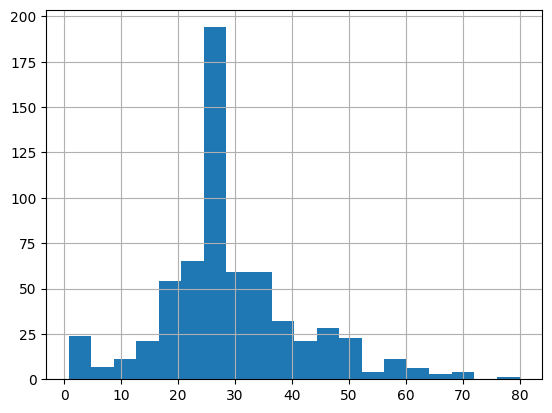

In [6]:
dftrain.age.hist(bins=20)

sex
male      410
female    217
Name: count, dtype: int64


<Axes: ylabel='sex'>

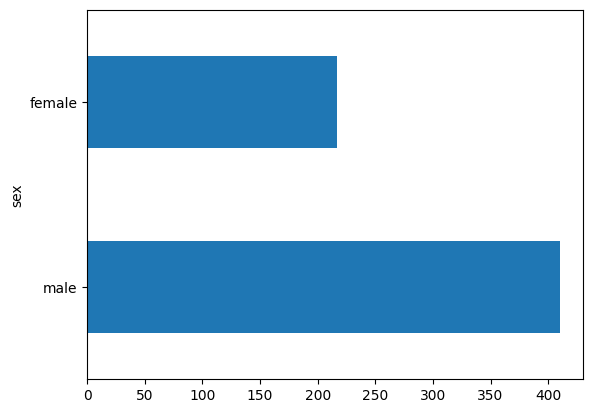

In [7]:
counts = dftrain['sex'].value_counts()
print(counts)

counts.plot(kind='barh')

<Axes: ylabel='class'>

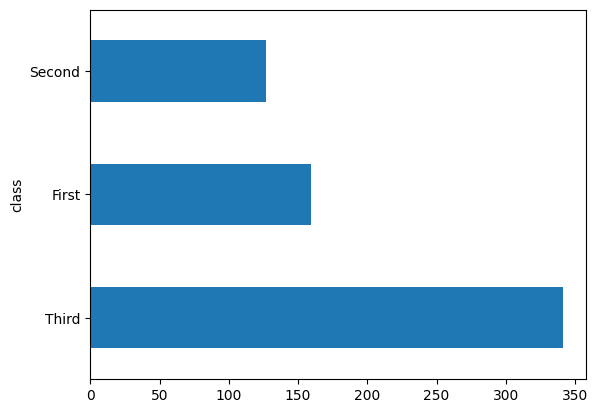

In [8]:
dftrain['class'].value_counts().plot(kind='barh')

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64


Text(0.5, 0, '% survive')

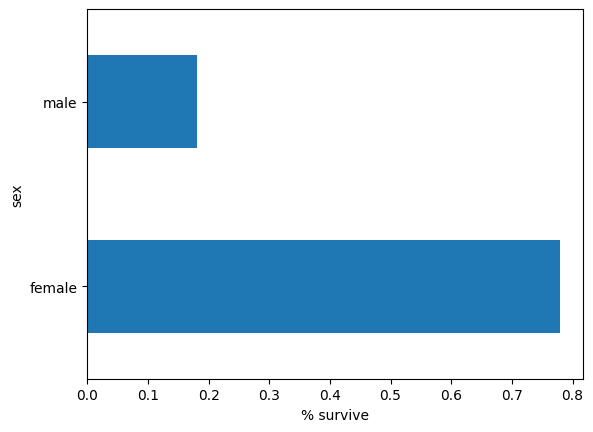

In [9]:
result = pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean()
print(result)

result.plot(kind='barh').set_xlabel('% survive')

In [12]:
from tensorflow import keras

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [18]:
print(train_images.shape)

(60000, 28, 28)


In [16]:
train_images[0,23,23]

194

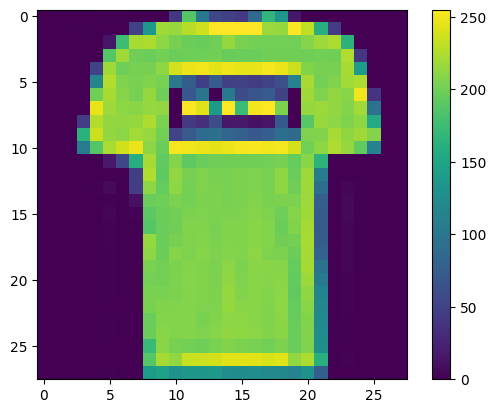

In [22]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [27]:
train_images = train_images/255
test_images = test_images / 255.0

In [30]:
test_images[0,20,23]

0.984313725490196

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4160 - accuracy: 0.8542
Epoch 2/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4096 - accuracy: 0.8559
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4033 - accuracy: 0.8575
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3981 - accuracy: 0.8594
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3935 - accuracy: 0.8615
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3893 - accuracy: 0.8620
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8647


In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 81.0104 - accuracy: 0.7217
Test accuracy: 0.7217000126838684


In [41]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [45]:
predictions.shape

(10000, 10)

In [49]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9